### Linear Regression

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

players = pd.read_csv("/Users/rileysallander/Desktop/ML/ML554/Data/Hitters.csv")

players = players.dropna()
## Define variables

X = players.drop(columns=["Salary"])
y = players["Salary"]

categorical = ["League", "Division", "NewLeague"]
numerical = X.select_dtypes(include=["int64","float64"]).columns


## preprocessing 

preprocessing = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ]
)

## pipeline

linearPipe = Pipeline(steps = [
    ("preprocessing", preprocessing),
    ("linear regression",LinearRegression())
])

## fit model 

linearPipe.fit(X,y)

## coefficents

model = linearPipe.named_steps["linear regression"]
preprocessed_data = linearPipe.named_steps["preprocessing"].transform(X)
feature_names = (
    numerical.tolist() + 
    linearPipe.named_steps["preprocessing"].named_transformers_["cat"].get_feature_names_out(categorical).tolist()
)
coefficients = pd.Series(model.coef_, index=feature_names)
important_coefficients = coefficients.sort_values(key=abs, ascending=False).head(5)
print("Most Important Coefficients:")
print(important_coefficients)

## cross val Mean Squared Error 
mse = -cross_val_score(linearPipe, X, y, cv=5, scoring="neg_mean_squared_error").mean()
print(f"Estimated Mean Squared Error: {mse:.2f}")

Most Important Coefficients:
CRuns     480.747135
CAtBat   -391.038655
Hits      337.830479
AtBat    -291.094556
CRBI      260.689886
dtype: float64
Estimated Mean Squared Error: 121136.31
Most Important Coefficients:
CRuns     480.747135
CAtBat   -391.038655
Hits      337.830479
AtBat    -291.094556
CRBI      260.689886
dtype: float64
Estimated Mean Squared Error: 121136.31


<p> For the regression model a 1 standard deviation jump in career runs would result in a $480 increase in a players salary. This is simmilar for hits last season with an increase of $337 along with a $260 increase in salary for career RBIs. career at bats and at bats this season and across career appear to decrease a players salary. This ridge had a MSE of 121136. <p>

### Ridge

In [26]:
## pipeline

ridgePipeline = Pipeline(steps = [
    ("preprocessing", preprocessing),
    ("ridge regression", Ridge())
])

# Define the grid for alpha
param_grid = {
    "ridge regression__alpha": (0.001, 0.01, 0.1, 1, 10)  # testing alpha values from 0.001 to 1000
}

# cross-validation to find alpha
grid_search = GridSearchCV(ridgePipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X, y)

# Best model from grid search
best_pipeline = grid_search.best_estimator_
best_alpha = grid_search.best_params_["ridge regression__alpha"]
print(f"Best alpha: {best_alpha}")

## coeficients 
model = best_pipeline.named_steps["ridge regression"]
feature_names = (
    numerical.tolist() + 
    best_pipeline.named_steps["preprocessing"].named_transformers_["cat"].get_feature_names_out(categorical).tolist()
)
coefficients = pd.Series(model.coef_, index=feature_names)
important_coefficients = coefficients.sort_values(key=abs, ascending=False).head(5)
print("Most Important Coefficients:")
print(important_coefficients)

## cross val Mean Squared Error 
mse = -cross_val_score(best_pipeline, X, y, cv=5, scoring="neg_mean_squared_error").mean()
print(f"Estimated Mean Squared Error: {mse:.2f}")

Best alpha: 1
Most Important Coefficients:
CRuns     320.802717
Hits      296.801967
AtBat    -271.088165
CAtBat   -225.511649
CWalks   -184.289408
dtype: float64
Estimated Mean Squared Error: 119034.33
Best alpha: 1
Most Important Coefficients:
CRuns     320.802717
Hits      296.801967
AtBat    -271.088165
CAtBat   -225.511649
CWalks   -184.289408
dtype: float64
Estimated Mean Squared Error: 119034.33


<p> For the ridge model a 1 standard deviation jump in career runs would result in a $320 increase in a players salary. this is simmilar for hits last season with an increase of $296. career walks and at bats this season and across career appear to decrease a players salary. This ridge model had an alpha of 1 and a MSE of 119034. <p>

### Lasso

In [30]:
## pipeline

lassoPipeline = Pipeline(steps = [
    ("preprocessing", preprocessing),
    ("lasso regression", Lasso())
])

# Define the grid for alpha
param_grid = {
    "lasso regression__alpha": (0.001, 0.01, 0.1, 1, 10)  # testing alpha values from 0.001 to 1000
}

# cross-validation to find alpha
grid_search = GridSearchCV(lassoPipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X, y)

# Best model from grid search
best_pipeline = grid_search.best_estimator_
best_alpha = grid_search.best_params_["lasso regression__alpha"]
print(f"Best alpha: {best_alpha}")

## coeficients 
model = best_pipeline.named_steps["lasso regression"]
feature_names = (
    numerical.tolist() + 
    best_pipeline.named_steps["preprocessing"].named_transformers_["cat"].get_feature_names_out(categorical).tolist()
)
coefficients = pd.Series(model.coef_, index=feature_names)
important_coefficients = coefficients.sort_values(key=abs, ascending=False).head(5)
print("Most Important Coefficients:")
print(important_coefficients)

## cross val Mean Squared Error 
mse = -cross_val_score(best_pipeline, X, y, cv=5, scoring="neg_mean_squared_error").mean()
print(f"Estimated Mean Squared Error: {mse:.2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+07, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.983e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+07, toler

Best alpha: 1
Most Important Coefficients:
CRuns     375.565034
Hits      304.358267
AtBat    -282.369623
CRBI      192.616442
CWalks   -189.643123
dtype: float64
Estimated Mean Squared Error: 119761.63
Best alpha: 1
Most Important Coefficients:
CRuns     375.565034
Hits      304.358267
AtBat    -282.369623
CRBI      192.616442
CWalks   -189.643123
dtype: float64
Estimated Mean Squared Error: 119761.63


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.808e+03, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.808e+03, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(


<p> For the lasso model a 1 standard deviation jump in career runs would result in a $375 increase in a players salary. this is simmilar for hits last season with an increase of $304. career walks and at bats this season appear to decrease a players salary. This lasso model had an alpha of 1 and a MSE of 119761. <p>

### Elastic Net

Best alpha: 0.1
Best l1_ratio: 0.9
Most Important Coefficients:
Hits      247.796626
AtBat    -232.313875
CRuns     223.614270
CWalks   -154.323911
CRBI      121.573864
dtype: float64
Estimated Mean Squared Error: 118794.05
Best alpha: 0.1
Best l1_ratio: 0.9
Most Important Coefficients:
Hits      247.796626
AtBat    -232.313875
CRuns     223.614270
CWalks   -154.323911
CRBI      121.573864
dtype: float64
Estimated Mean Squared Error: 118794.05


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


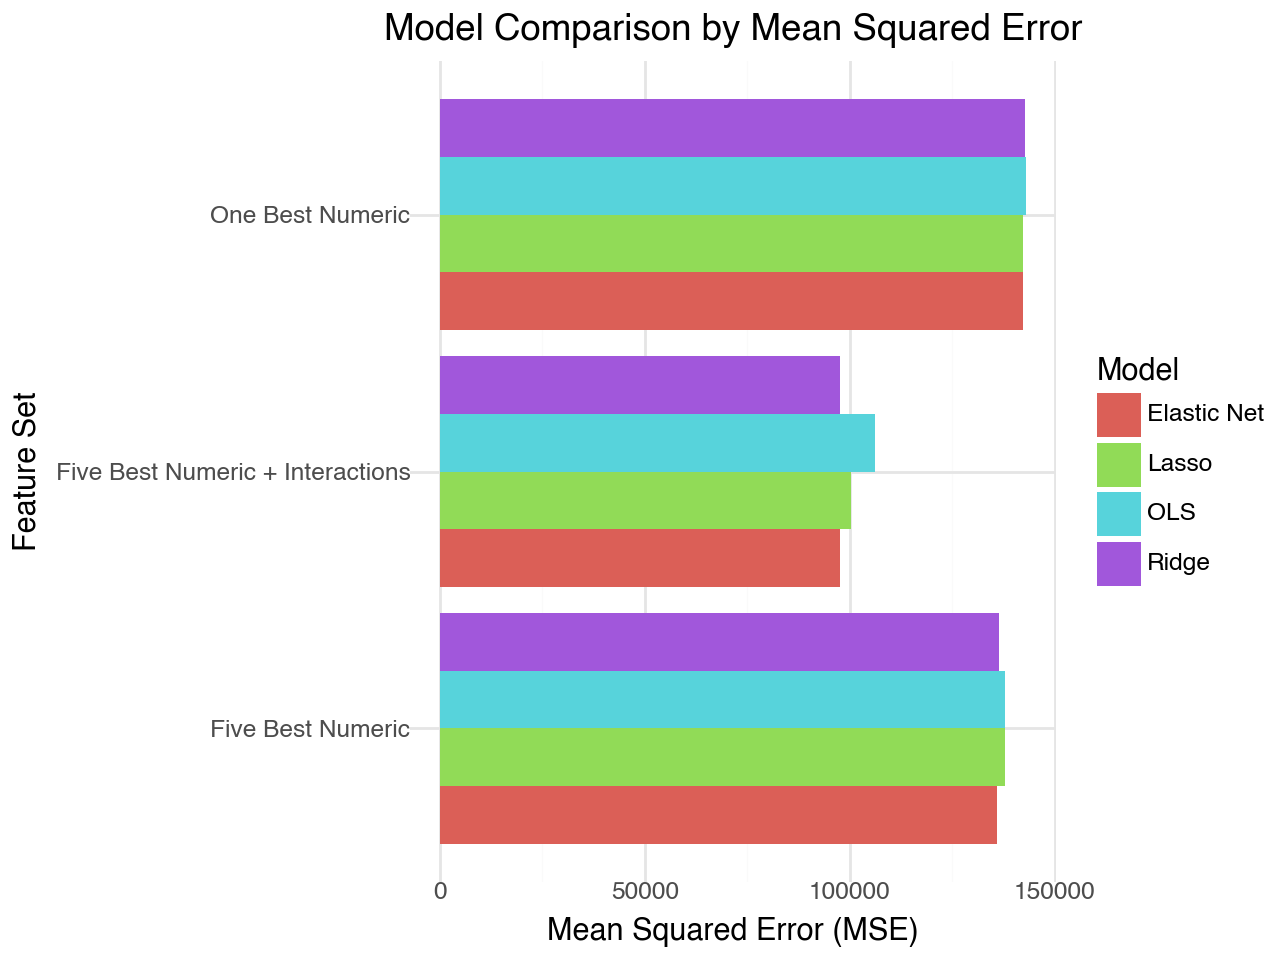

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


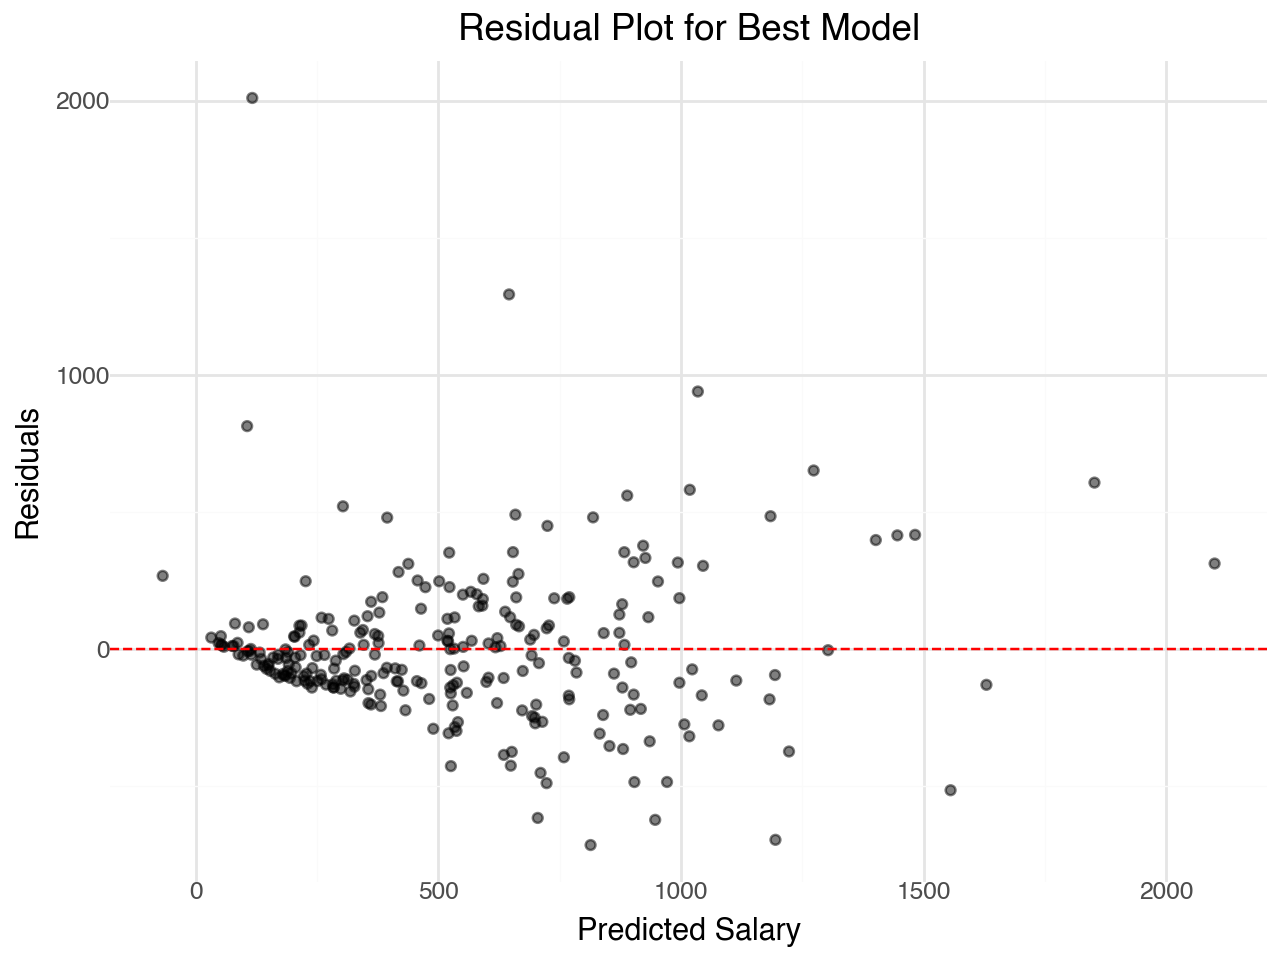

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Preprocessing steps
preprocessing = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ]
)

# Define the pipeline
elasticNetPipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("elastic net regression", ElasticNet(max_iter=10000))
])

# Grid of alpha and l1_ratio values for tuning
param_grid = {
    "elastic net regression__alpha": [0.001, 0.01, 0.1, 1, 10],     # Testing different alpha values
    "elastic net regression__l1_ratio": [0.1, 0.5, 0.7, 0.9, 1]     # Testing different l1_ratio values
}

# grid search alpha and l1_ratio tuning
grid_search = GridSearchCV(elasticNetPipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X, y)

# Best model 
best_pipeline = grid_search.best_estimator_
best_alpha = grid_search.best_params_["elastic net regression__alpha"]
best_l1_ratio = grid_search.best_params_["elastic net regression__l1_ratio"]
print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")

## coefficients
model = best_pipeline.named_steps["elastic net regression"]
feature_names = (
    numerical.tolist() + 
    best_pipeline.named_steps["preprocessing"].named_transformers_["cat"].get_feature_names_out(categorical).tolist()
)
coefficients = pd.Series(model.coef_, index=feature_names)
important_coefficients = coefficients.sort_values(key=abs, ascending=False).head(5)
print("Most Important Coefficients:")
print(important_coefficients)

#$ Mean Squared Error cross-validation 
mse = -cross_val_score(best_pipeline, X, y, cv=5, scoring="neg_mean_squared_error").mean()
print(f"Estimated Mean Squared Error: {mse:.2f}")



<p> For the lasso model a 1 standard deviation jump in career runs would result in a $223 increase in a players salary. this is simmilar for hits last season with an increase of $247. career walks and at bats this season appear to decrease a players salary. This lasso model had an alpha of 1 and a MSE of 118794. <p>

## Part 2 
###### I had chatGPT help me streamline this into one pipeline, the way I would've done it would take a century 

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np

categorical_columns = ["League", "Division", "NewLeague"]
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns

correlations = X[numeric_columns].apply(lambda x: x.corr(y)).abs().sort_values(ascending=False)
best_numeric_variable = correlations.index[0]  
best_five_numeric_variables = correlations.index[:5] 

feature_sets = {
    "One Best Numeric": [best_numeric_variable],
    "Five Best Numeric": best_five_numeric_variables,
    "Five Best Numeric + Interactions": best_five_numeric_variables
}


best_categorical_variable = categorical_columns[0]

model_specs = {
    "OLS": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"regression__alpha": [0.1, 1, 10, 100]}),
    "Lasso": (Lasso(max_iter=10000), {"regression__alpha": [0.001, 0.01, 0.1, 1, 10]}),
    "Elastic Net": (ElasticNet(max_iter=10000), {
        "regression__alpha": [0.001, 0.01, 0.1, 1, 10],
        "regression__l1_ratio": [0.1, 0.5, 0.7, 0.9, 1]
    })
}

results = {}

for feature_set_name, features in feature_sets.items():
    print(f"\nEvaluating Feature Set: {feature_set_name}")
    
   
    if "Interactions" in feature_set_name:
        preprocessing = ColumnTransformer([
            ("num", Pipeline([
                ("selector", SelectKBest(f_regression, k=5)),
                ("poly", PolynomialFeatures(interaction_only=True, include_bias=False)),
                ("scaler", StandardScaler())
            ]), best_five_numeric_variables),
            ("cat", OneHotEncoder(drop="first"), [best_categorical_variable])
        ])
    else:
        preprocessing = ColumnTransformer([
            ("num", StandardScaler(), features),
            ("cat", OneHotEncoder(drop="first"), [best_categorical_variable])
        ])
    
    for model_name, (model, param_grid) in model_specs.items():
        print(f"  Model: {model_name}")
        
        pipeline = Pipeline([
            ("preprocessing", preprocessing),
            ("regression", model)
        ])
        
       
        if param_grid:
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
            grid_search.fit(X, y)
            best_pipeline = grid_search.best_estimator_
            mse = -grid_search.best_score_
            print(f"    Best params: {grid_search.best_params_}")
        else:
            mse = -cross_val_score(pipeline, X, y, cv=5, scoring="neg_mean_squared_error").mean()
            best_pipeline = pipeline.fit(X, y)
        
        print(f"    Estimated MSE: {mse:.2f}")
        
        # Store result
        results[(feature_set_name, model_name)] = mse

# Convert results to a DataFrame for easier comparison
results_df = pd.DataFrame(results.items(), columns=["Feature_Set_Model", "MSE"])
results_df[["Feature_Set", "Model"]] = pd.DataFrame(results_df["Feature_Set_Model"].tolist(), index=results_df.index)
results_df = results_df.drop(columns=["Feature_Set_Model"]).sort_values(by="MSE")
print("\nComparison of Model Performance across Feature Sets:")
print(results_df)



Evaluating Feature Set: One Best Numeric
  Model: OLS
    Estimated MSE: 143060.41
  Model: Ridge


Evaluating Feature Set: One Best Numeric
  Model: OLS
    Estimated MSE: 143060.41
  Model: Ridge


    Best params: {'regression__alpha': 10}
    Estimated MSE: 142871.57
  Model: Lasso
    Best params: {'regression__alpha': 10}
    Estimated MSE: 142871.57
  Model: Lasso


    Best params: {'regression__alpha': 10}
    Estimated MSE: 142271.87
  Model: Elastic Net
    Best params: {'regression__alpha': 10}
    Estimated MSE: 142271.87
  Model: Elastic Net


    Best params: {'regression__alpha': 10, 'regression__l1_ratio': 1}
    Estimated MSE: 142271.87

Evaluating Feature Set: Five Best Numeric
  Model: OLS
    Estimated MSE: 137877.14
  Model: Ridge
    Best params: {'regression__alpha': 1}
    Estimated MSE: 136411.44
  Model: Lasso
    Best params: {'regression__alpha': 10, 'regression__l1_ratio': 1}
    Estimated MSE: 142271.87

Evaluating Feature Set: Five Best Numeric
  Model: OLS
    Estimated MSE: 137877.14
  Model: Ridge
    Best params: {'regression__alpha': 1}
    Estimated MSE: 136411.44
  Model: Lasso


    Best params: {'regression__alpha': 0.01}
    Estimated MSE: 137862.25
  Model: Elastic Net
    Best params: {'regression__alpha': 0.01}
    Estimated MSE: 137862.25
  Model: Elastic Net


    Best params: {'regression__alpha': 0.01, 'regression__l1_ratio': 0.7}
    Estimated MSE: 136000.34

Evaluating Feature Set: Five Best Numeric + Interactions
  Model: OLS
    Estimated MSE: 106162.12
  Model: Ridge
    Best params: {'regression__alpha': 0.1}
    Estimated MSE: 97653.91
  Model: Lasso
    Best params: {'regression__alpha': 0.01, 'regression__l1_ratio': 0.7}
    Estimated MSE: 136000.34

Evaluating Feature Set: Five Best Numeric + Interactions
  Model: OLS
    Estimated MSE: 106162.12
  Model: Ridge
    Best params: {'regression__alpha': 0.1}
    Estimated MSE: 97653.91
  Model: Lasso


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.752e+06, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.284e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.951e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.961e+06, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.682e+06, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.438e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.068e+06, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.670e+06, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+06, tolerance: 4.137e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+06, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+05, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.488e+06, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.819e+06, toler

    Best params: {'regression__alpha': 0.1}
    Estimated MSE: 100211.34
  Model: Elastic Net
    Best params: {'regression__alpha': 0.1}
    Estimated MSE: 100211.34
  Model: Elastic Net


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.556e+06, tolerance: 4.137e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.950e+06, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.523e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.325e+06, tolerance: 4.137e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.207e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.286e+06, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.985e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.568e+06, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.883e+06, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.248e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.745e+06, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.023e+06, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.752e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.951e+06, tolerance: 4.137e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.666e+06, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.961e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.532e+04, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+03, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.682e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.979e+06, tolerance: 4.137e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.068e+06, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.670e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+06, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+06, tolerance: 4.137e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+06, toler

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+06, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(


    Best params: {'regression__alpha': 0.001, 'regression__l1_ratio': 0.5}
    Estimated MSE: 97634.30

Comparison of Model Performance across Feature Sets:
              MSE                       Feature_Set        Model
11   97634.298494  Five Best Numeric + Interactions  Elastic Net
9    97653.909519  Five Best Numeric + Interactions        Ridge
10  100211.344809  Five Best Numeric + Interactions        Lasso
8   106162.124848  Five Best Numeric + Interactions          OLS
7   136000.340863                 Five Best Numeric  Elastic Net
5   136411.436732                 Five Best Numeric        Ridge
6   137862.253966                 Five Best Numeric        Lasso
4   137877.136987                 Five Best Numeric          OLS
2   142271.866145                  One Best Numeric        Lasso
3   142271.866145                  One Best Numeric  Elastic Net
1   142871.574792                  One Best Numeric        Ridge
0   143060.414600                  One Best Numeric          OL

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.122e+06, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(


### Discussion

##### Ridge vs OLS 

<p> When comparing the ridge regression coefficients to the linear regression it appears that all of the ridge regression coefficents are shrunken versions of the linear regression ones. This makes sense due to the peanalized nature of ridge regression that intentionally shrinks the coefficents in a model based on the alpha value. <p>

##### Lasso regression comparisons 

<p> Lasso regression has the capa bility to shhrink parameters all the way down to zero unlike ridge. Based on the inputs given to the lasso model changes how it shrinks the coefficents so it makes sense that the models are each different in their MSE and coefficent size. This makes sense as without the the presence of some of the parameters the lasso regression may weight parameters differently. <p>

##### Elastic Net vs Lasso and Ridge

<p> In comparison of the best parameters the Elastic Net is almost always the winner because it is essentially the best of both worlds for lasso and ridge. So it is capable of creating a stable model while also shrinking some parameters to zero. This makes the model "win" in many cases as it does what both models do at the same time. <p>

### Best Model


The best model created is an elastic net model with tuned values of: aplpha = 0.001 and l1 ratio of 0.5. This model uses the top 5 parameters of hits runs atbats career runs and career walks along with the interaction between them and division. This model ended up having the lowest MSE of 97634.

<positron-console-cell-48>:30: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


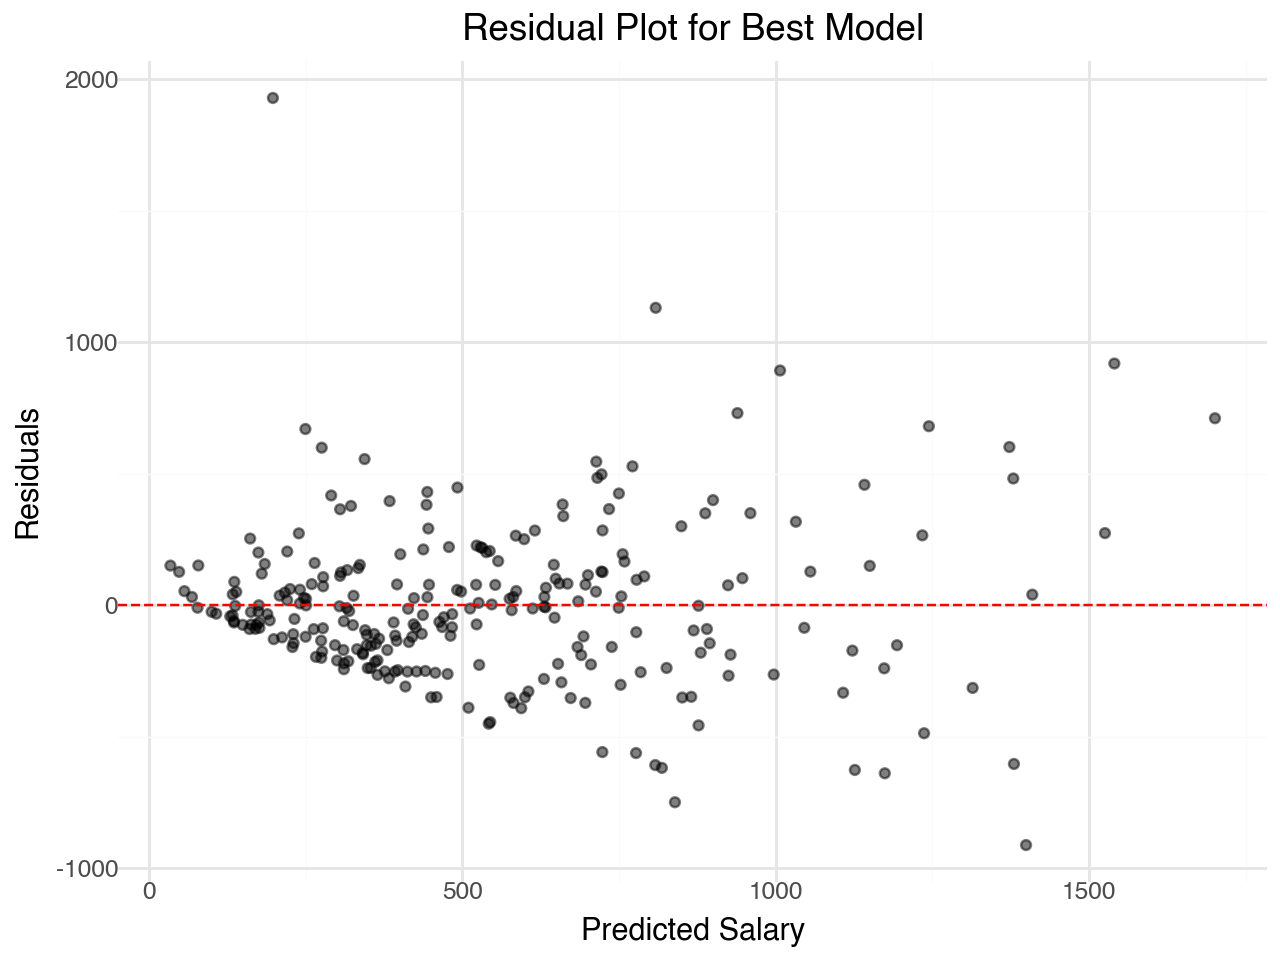

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


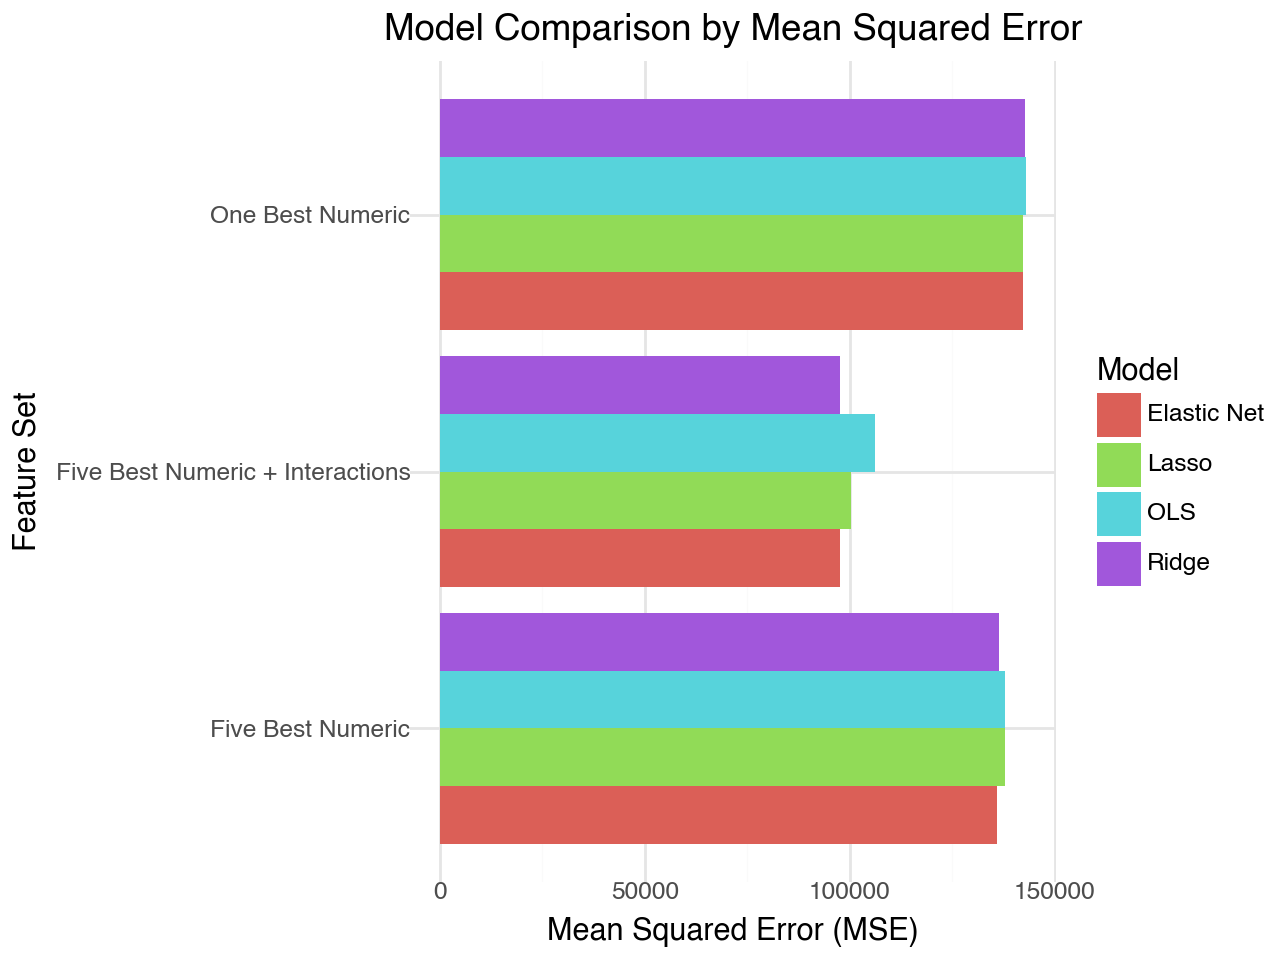

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


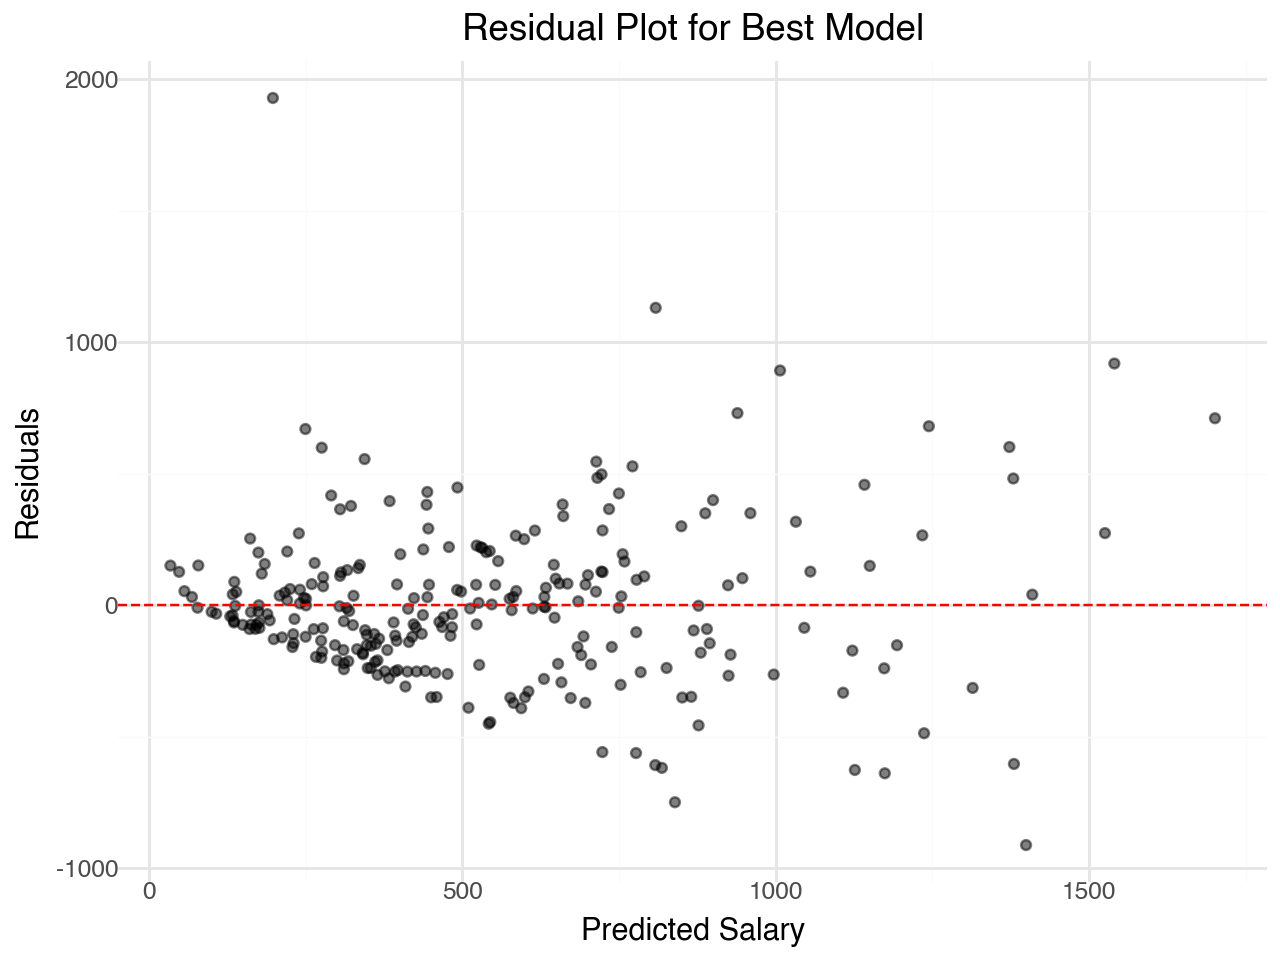

In [48]:
from plotnine import ggplot, aes, geom_point, geom_hline, theme_minimal, labs


best_model_pipeline = grid_search.best_estimator_
best_model_pipeline.fit(X, y)

# Generate predictions and residuals
y_pred = best_model_pipeline.predict(X)
residuals = y - y_pred

# Create a DataFrame for plotting
residuals_df = pd.DataFrame({
    "Predicted": y_pred,
    "Residuals": residuals
})

# Plot residuals
residual_plot = (
    ggplot(residuals_df, aes(x="Predicted", y="Residuals")) +
    geom_point(alpha=0.5) +
    geom_hline(yintercept=0, color="red", linetype="dashed") +
    theme_minimal() +
    labs(
        title="Residual Plot for Best Model",
        x="Predicted Salary",
        y="Residuals"
    )
)

print(residual_plot)
